In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/jessie/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1. Read data

In [2]:
dt=pd.read_csv('https://raw.githubusercontent.com/Programming-Systems-Lab/Capstone-2/master/data/Training_Data/Training_Dataset.csv')
dt.drop_duplicates(inplace=True)
dt.head()

,Package_Name,SHA256,ThumbPrint,Application_Category,Family_Name,Malware_Category,Malware/Benign,Permission: FACTORY_TEST,Permission: DUMP,Permission: BATTERY_STATS,...,pose_6dof,pressure,proximity,relative_humidity,rotation_vector,significant_motion,stationary_detect,step_counter,step_detector,temperature
0,a.com.saichedazhanjiangshi.bianz,53DCE48C4E666132A413F1C0C9D105EF7C018D7D4400E9...,F0CA270347F8E2D6D21F4F249BB6FA82AB6F83E3,NaN,NaN,NaN,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,a.com.saichedazhanjiangshi.bm,D5B7A0B21A9F2893B29939FE703E5FCA6E2625B72B9435...,672C7E09D7971FEFF924CB9BB9DF501B068699D2,NaN,NaN,NaN,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,a.com.tiantianaipaoku.biafewg,9B865DB16D7052C101B075F3B3CBC923F709D101F14EA1...,2567A99F17B580AABE2846936E4CDE5D77D74115,NaN,NaN,NaN,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,a.com.tiantianaipaoku.bianzs,28388B523EB9A554F97AF745710B6A6F074F51AAEE41D2...,61ED377E85D386A8DFEE6B864BD85B0BFAA5AF81,NaN,NaN,NaN,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,advance.car.racing,DCCDDBD3268C0C922170F6C1035AFD670BA020C08012D6...,0C6F6BB008DE7BF449587AE869E463A14137944A,Racing,NaN,NaN,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
### get the ground truth labels
dt['Malware/Benign']=dt['Malware/Benign'].apply(lambda x: 1 if x>0 else 0)

### 2. Drop unuseful columns

#### 2.1 Drop empty columns

In [4]:
NAcols=dt.columns[dt.isnull().any()]
list(NAcols)

['Application_Category',
 'Family_Name',
 'Malware_Category',
 'sdkVersion',
 'targetSdkVersion']

In [5]:
dt[list(NAcols)].isnull().sum()

Application_Category     8591
Family_Name             10951
Malware_Category        10951
sdkVersion              10951
targetSdkVersion        10951
dtype: int64

In [6]:
droplist1=list(NAcols)[1:]

**Empty columns include:  
Family_Name, Malware_Category, sdkVersion, targetSdkVersion.  
Application_Category might be useful, so keep it for now.**

In [7]:
dt.groupby('Application_Category')['Malware/Benign'].agg(['mean', 'count'])

,mean,count
Application_Category,,
Action,0.602564,78
Adventure,0.652174,23
Arcade,0.614130,184
Art & Design,1.000000,1
Beauty,0.750000,4
...,...,...
赛车竞速,0.521739,23
辅助工具,0.500000,2
通话通讯,0.600000,5


#### 2.2 Check column types and remove columns whose variance is 1

In [8]:
dt.columns[dt.dtypes=='object']

Index(['Package_Name', 'SHA256', 'ThumbPrint', 'Application_Category'], dtype='object')

In [9]:
dt.columns[dt.dtypes=='float64']

Index(['Family_Name', 'Malware_Category', 'sdkVersion', 'targetSdkVersion'], dtype='object')

In [10]:
droplist2=list(dt.iloc[:,7:].columns[dt.iloc[:,7:].var()==0])

#### 2.3 Drop high cardinality columns

In [11]:
dt['ThumbPrint'].nunique()  # drop it

3548

In [12]:
dt['Package_Name'].apply(lambda x: '.'.join(x.split('.')[:2])).nunique() # drop it

5116

In [13]:
dt['Package_Name'].apply(lambda x: '.'.join(x.split('.')[:1])).nunique() # drop it

401

#### 2.4 Get the final dataset. Shirish said we can drop the first 6 columns.

In [14]:
dt2=dt.drop(columns=droplist1+droplist2+['Package_Name','ThumbPrint','Application_Category','SHA256'])
dt2.head()

,Malware/Benign,Permission: FACTORY_TEST,Permission: DUMP,Permission: BATTERY_STATS,Permission: BIND_WALLPAPER,Permission: BIND_INPUT_METHOD,Permission: READ_LOGS,Permission: INSTALL_LOCATION_PROVIDER,Permission: READ_FRAME_BUFFER,Permission: SET_PROCESS_LIMIT,...,pose_6dof,pressure,proximity,relative_humidity,rotation_vector,significant_motion,stationary_detect,step_counter,step_detector,temperature
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3. Modeling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, plot_roc_curve, auc, recall_score, precision_score
from sklearn.metrics import precision_recall_fscore_support, balanced_accuracy_score # average of recall obtained on each class
from sklearn.utils import class_weight

#### Distribution of target

In [16]:
X,y=dt2.drop(columns=['Malware/Benign']), dt2['Malware/Benign']

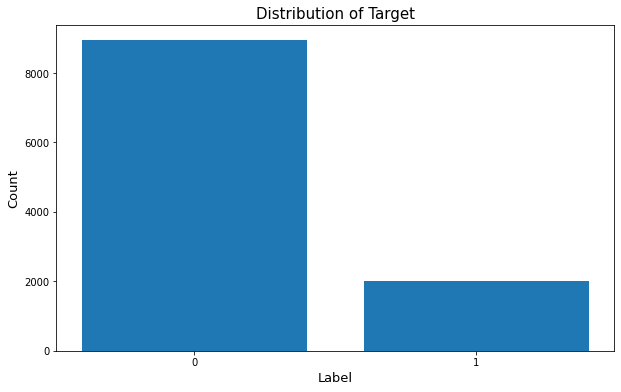

In [17]:
plt.figure(figsize = (10, 6))
plt.bar(['0', '1'], y.value_counts().values)
plt.xlabel('Label', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.title('Distribution of Target', fontsize = 15)
plt.show()

#### 3.1 Train test split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 123, 
                                                    stratify = y)

X_train_no_sensor, X_test_no_sensor=X_train.iloc[:,:-29], X_test.iloc[:,:-29]

#### 3.2 Train different models

In [19]:
### logistic
scores = cross_validate(LogisticRegression(max_iter = 1000), X_train, y_train, scoring=('roc_auc','accuracy'),cv=5)
print('Cross-Validation Accuracy Score', scores['test_accuracy'].mean())
print('Cross-Validation AUC Score', scores['test_roc_auc'].mean())

Cross-Validation Accuracy Score 0.8939497716894976
Cross-Validation AUC Score 0.9014804652134929


In [20]:
### svm
scores = cross_validate(SVC(), X_train, y_train, scoring=('roc_auc','accuracy'),cv=5)
print('Cross-Validation Accuracy Score', scores['test_accuracy'].mean())
print('Cross-Validation AUC Score', scores['test_roc_auc'].mean())

Cross-Validation Accuracy Score 0.9033105022831049
Cross-Validation AUC Score 0.9016784024758087


In [21]:
### knn
scores = cross_validate(KNeighborsClassifier(), X_train, y_train, scoring=('roc_auc','accuracy'),cv=5)
print('Cross-Validation Accuracy Score', scores['test_accuracy'].mean())
print('Cross-Validation AUC Score', scores['test_roc_auc'].mean())

Cross-Validation Accuracy Score 0.8915525114155252
Cross-Validation AUC Score 0.8927550078426778


In [22]:
### xgboost
scores = cross_validate(XGBClassifier(), X_train, y_train, scoring=('roc_auc','accuracy'),cv=5)
print('Cross-Validation Accuracy Score', scores['test_accuracy'].mean())
print('Cross-Validation AUC Score', scores['test_roc_auc'].mean())

Cross-Validation Accuracy Score 0.9067351598173516
Cross-Validation AUC Score 0.9423470279878317


**3.3 Tune KNN**

##### ----- with sensors, all apks, no smote

In [23]:
param_grid = {'n_neighbors': [1,3,5,7,9,11,13],
              'weights': ['uniform','distance']
             }

In [24]:
#fit model to data
knn_gscv1 = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5,n_jobs=-1,
                        scoring='balanced_accuracy')
knn_gscv1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='balanced_accuracy')

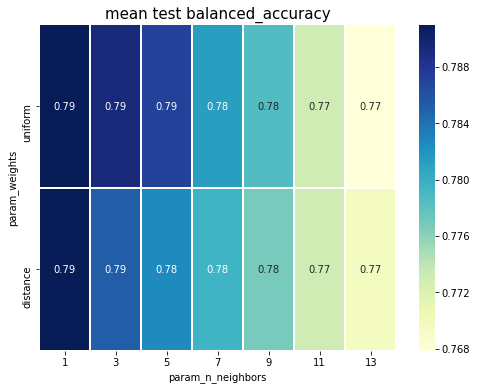

In [25]:
# visualization
result1=pd.DataFrame(knn_gscv1.cv_results_)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(result1.pivot('param_weights','param_n_neighbors','mean_test_score'),\
            annot=True,linewidths=.5,ax=ax,cmap="YlGnBu")
ax.set_title("mean test balanced_accuracy", size=15)
ax.invert_yaxis()
plt.show()

In [26]:
y_pred=knn_gscv1.predict(X_test)
print('Test balanced accuracy is:', balanced_accuracy_score(y_test,y_pred))

Test balanced accuracy is: 0.7440860140152412


##### ----- with sensors, all apks, smote  
SMOTE: Synthetic Minority Oversampling Technique  
Adds synthetic interpolated data to smaller class  
For each sample in minority class:  
– Pick random neighbor from k neighbors (default=5)  
– Pick point on line connecting the two uniformly (or within rectangle)  
– Repeat.  

In [27]:
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from collections import Counter

0.7.0


In [28]:
oversample = SMOTE(random_state=222)
print('Originally: ',Counter(y_train))
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)
print('Now: ',Counter(y_train_os))

Originally:  Counter({1: 7157, 0: 1603})
Now:  Counter({1: 7157, 0: 7157})


In [29]:
#fit model to data
knn_gscv2 = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5,n_jobs=-1,
                        scoring='balanced_accuracy')
knn_gscv2.fit(X_train_os, y_train_os)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='balanced_accuracy')

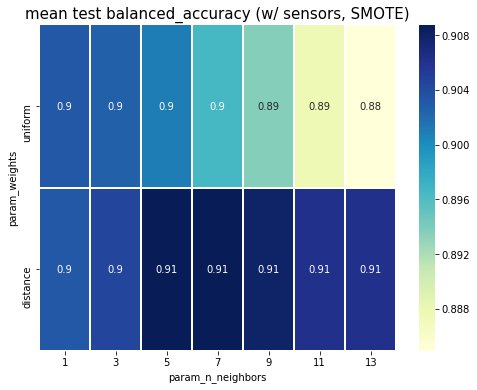

In [30]:
# visualization
result2=pd.DataFrame(knn_gscv2.cv_results_)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(result2.pivot('param_weights','param_n_neighbors','mean_test_score'),\
            annot=True,linewidths=.5,ax=ax,cmap="YlGnBu")
ax.set_title("mean test balanced_accuracy (w/ sensors, SMOTE)", size=15)
ax.invert_yaxis()
plt.show()

In [31]:
y_pred_s=knn_gscv2.predict(X_test)
print('Test balanced accuracy is:', balanced_accuracy_score(y_test,y_pred_s))

Test balanced accuracy is: 0.8024101756781231


**SMOTE improves test balanced accuracy from 0.74 to 0.80, we should use SMOTE for modeling.**

In [32]:
print('Test Accuracy is:', accuracy_score(y_test,y_pred_s))
print('Test Precision is:', precision_score(y_test,y_pred_s))
print('Test Recall is:', recall_score(y_test,y_pred_s))

Test Accuracy is: 0.8795070743952533
Test Precision is: 0.9281705948372615
Test Recall is: 0.924022346368715


##### ----- without sensors, all apks, smote  

In [33]:
X_train_os, y_train_os = oversample.fit_resample(X_train_no_sensor, y_train)

In [34]:
#fit model to data
knn_gscv3 = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5,n_jobs=-1,
                        scoring='balanced_accuracy')
knn_gscv3.fit(X_train_os, y_train_os)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='balanced_accuracy')

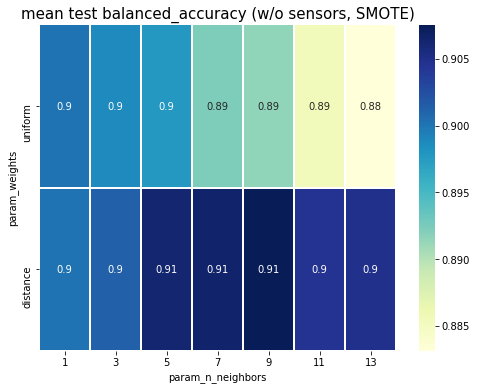

In [35]:
# visualization
result3=pd.DataFrame(knn_gscv3.cv_results_)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(result3.pivot('param_weights','param_n_neighbors','mean_test_score'),\
            annot=True,linewidths=.5,ax=ax,cmap="YlGnBu")
ax.set_title("mean test balanced_accuracy (w/o sensors, SMOTE)", size=15)
ax.invert_yaxis()
plt.show()

In [36]:
y_pred_ns=knn_gscv3.predict(X_test_no_sensor)
print('Test balanced accuracy is:', balanced_accuracy_score(y_test,y_pred_ns))
print('Test Accuracy is:', accuracy_score(y_test,y_pred_ns))
print('Test Precision is:', precision_score(y_test,y_pred_ns))
print('Test Recall is:', recall_score(y_test,y_pred_ns))

Test balanced accuracy is: 0.804345282046281
Test Accuracy is: 0.8795070743952533
Test Precision is: 0.9291338582677166
Test Recall is: 0.9229050279329609


**Compare the confusion matrix**

In [37]:
# with sensor
confusion_matrix(y_test,y_pred_s)

array([[ 273,  128],
       [ 136, 1654]])

In [38]:
# w/o sensors
confusion_matrix(y_test,y_pred_ns)

array([[ 275,  126],
       [ 138, 1652]])

### 4. Analysis

In [56]:
# add back SHA256, thumbprint and ground truth to the X_test
X_test = X_test.merge(dt[['Malware/Benign','SHA256', 'ThumbPrint']], left_index=True, right_index=True)
X_test['y_pred_with_sensor'] = y_pred_s
X_test['y_pred_wo_sensor'] = y_pred_ns

#### 4.1 Paired apps v.s. non-paired apps

In [40]:
# find the apk counterpart for all apks appear in X_train
X_train = X_train.merge(dt[['Malware/Benign','SHA256', 'ThumbPrint']], left_index=True, right_index=True)
f= open("repackaging_pairs.txt").readlines()
counterparts=set()
for line in f:
    o,r=line.strip().split(',')
    if o in X_train['SHA256'].values:
        counterparts.add(r)
    if r in X_train['SHA256'].values:
        counterparts.add(o)


In [41]:
# iterate X_test, mark the apk whose counterpart is in X_train as 1 and others as 0
X_test['counterpart in training?']=0
for ind, row in X_test.iterrows():
    if row['SHA256'] in counterparts:
        X_test.loc[ind,'counterpart in training?']=1

print('# of test apps whose counterpart is in training set:', sum(X_test['counterpart in training?']))
print('# of test apps whose counterpart is NOT in training set:', len(X_test)-sum(X_test['counterpart in training?']))

# of test apps whose counterpart is in training set: 704
# of test apps whose counterpart is NOT in training set: 1487


In [42]:
print('With sensors:')
print('Overall accuracy:',accuracy_score(X_test['Malware/Benign'],X_test['y_pred_with_sensor']))
print('Accuracy for apps whose original/repackaged counterpart is in training:', 
      accuracy_score(X_test[X_test['counterpart in training?']==1]['Malware/Benign'],X_test[X_test['counterpart in training?']==1]['y_pred_with_sensor']))
print('Accuracy for apps whose original/repackaged counterpart is NOT in training:', 
      accuracy_score(X_test[X_test['counterpart in training?']==0]['Malware/Benign'],X_test[X_test['counterpart in training?']==0]['y_pred_with_sensor']))

print('Without sensors')
print('Overall accuracy:',accuracy_score(X_test['Malware/Benign'],X_test['y_pred_wo_sensor']))
print('Accuracy for apps whose original/repackaged counterpart is in training:', 
      accuracy_score(X_test[X_test['counterpart in training?']==1]['Malware/Benign'],X_test[X_test['counterpart in training?']==1]['y_pred_wo_sensor']))
print('Accuracy for apps whose original/repackaged counterpart is NOT in training:', 
      accuracy_score(X_test[X_test['counterpart in training?']==0]['Malware/Benign'],X_test[X_test['counterpart in training?']==0]['y_pred_wo_sensor']))

With sensors:
Overall accuracy: 0.8795070743952533
Accuracy for apps whose original/repackaged counterpart is in training: 0.7514204545454546
Accuracy for apps whose original/repackaged counterpart is NOT in training: 0.9401479488903833
Without sensors
Overall accuracy: 0.8795070743952533
Accuracy for apps whose original/repackaged counterpart is in training: 0.7485795454545454
Accuracy for apps whose original/repackaged counterpart is NOT in training: 0.9414929388029589


#### 4.2 Paired apps v.s. non-paired apps

In [63]:
# scores of top 10 authors
X_test['correct'] = X_test['Malware/Benign'] == X_test['y_pred_with_sensor']
summ = X_test[X_test['Malware/Benign']==1].groupby('ThumbPrint')['correct'].agg([('N','count'),('correct','sum')])\
.sort_values('N', ascending=False).iloc[:10,:]
summ['score'] = summ['correct']/summ['N']
print('with sensors:')
summ

with sensors:


,N,correct,score
ThumbPrint,,,
61ED377E85D386A8DFEE6B864BD85B0BFAA5AF81,160,132,0.825000
28EAC321D548B4247D9C84810C0656EC9426716B,76,69,0.907895
F3FA0BE3FEB31AC2920E399AF0F0CFB37D729284,72,72,1.000000
95653B2BD67722B6EF4021CB812FF2B4DC5DCF03,62,62,1.000000
F243B92AD5EABA98BD43084864C4D5483F191CD9,52,51,0.980769
00F7DCC41988D8642C51D4F8BA5A42C413275885,48,48,1.000000
45A195BE1E17B3AFA086623DCC4661DEE2043B70,43,43,1.000000
6C699C8D1F7157366994ACDA5495051F2C58D7AB,42,42,1.000000
699512C8B49E7A01A622BD250544E09A80A42D55,38,33,0.868421


In [44]:
# scores of top 10 authors
X_test['correct'] = X_test['Malware/Benign'] == X_test['y_pred_with_sensor']
summ = X_test[X_test['Malware/Benign']==1].groupby('ThumbPrint')['correct'].agg([('N','count'),('correct','sum')])\
.sort_values('N', ascending=False).iloc[:10,:]
summ['score'] = summ['correct']/summ['N']
print('without sensors:')
summ

without sensors:


,N,correct,score
ThumbPrint,,,
61ED377E85D386A8DFEE6B864BD85B0BFAA5AF81,160,132,0.825000
28EAC321D548B4247D9C84810C0656EC9426716B,76,69,0.907895
F3FA0BE3FEB31AC2920E399AF0F0CFB37D729284,72,72,1.000000
95653B2BD67722B6EF4021CB812FF2B4DC5DCF03,62,62,1.000000
F243B92AD5EABA98BD43084864C4D5483F191CD9,52,51,0.980769
00F7DCC41988D8642C51D4F8BA5A42C413275885,48,48,1.000000
45A195BE1E17B3AFA086623DCC4661DEE2043B70,43,43,1.000000
6C699C8D1F7157366994ACDA5495051F2C58D7AB,42,42,1.000000
699512C8B49E7A01A622BD250544E09A80A42D55,38,33,0.868421


#### 4.3 Test on repackaged benign dataset

In [45]:
benign_repack = pd.read_csv("https://raw.githubusercontent.com/Programming-Systems-Lab/Capstone-2/master/data/Test_Data/Test_Dataset.csv")
benign_repack_y = pd.read_csv("https://raw.githubusercontent.com/Programming-Systems-Lab/Capstone-2/master/data/Test_Data/Labels_Test.csv")

In [46]:
cols=dt2.columns
X_train_sensors=benign_repack[cols].drop(columns='Malware/Benign')
X_train_wo_sensors=X_train_sensors.iloc[:,:-29]

In [47]:
# make prediction
y_pred_sensor = knn_gscv2.predict(X_train_sensors)
y_pred_wo_sensor = knn_gscv3.predict(X_train_wo_sensors)

In [49]:
print("Test score with sensors:",  round(balanced_accuracy_score(benign_repack_y, y_pred_sensor),3))
print("Test score without sensors:", round(balanced_accuracy_score(benign_repack_y, y_pred_wo_sensor),3))

Test score with sensors: 0.937
Test score without sensors: 0.935


/Users/jessie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
